# Clone WaveRNN repo

In [1]:
# Clone the repo
# https://github.com/as-ideas/ForwardTacotron
# https://colab.research.google.com/github/as-ideas/ForwardTacotron/blob/master/notebooks/synthesize.ipynb#scrollTo=LHfPLGkqe-Jx
!git clone https://github.com/as-ideas/ForwardTacotron
# Checkout to latest version as of the time this notebook was created
!cd ForwardTacotron && git reset --hard "f537c5f16f9459948b64f563749d65dcedacbe04"

Cloning into 'ForwardTacotron'...
remote: Enumerating objects: 5473, done.
remote: Counting objects: 100% (1844/1844), done.
remote: Compressing objects: 100% (742/742), done.
remote: Total 5473 (delta 1341), reused 1515 (delta 1097), pack-reused 3629
Receiving objects: 100% (5473/5473), 205.55 MiB | 13.96 MiB/s, done.
Resolving deltas: 100% (3751/3751), done.
HEAD is now at f537c5f Update README.md


# Download data

In [2]:
Size = "Smaller" #@param ["Full", "Small", "Smaller"]
if Size == "Full":
  vctk_dataset_path = "VCTK-Corpus/"
  archive_path="VCTK-Corpus.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EcnCAgHdAwBJmWk9vNcpiKgB5Rhi6GNtSchx6zGEhWe-fw?download=1"
  !test ! -e $vctk_dataset_path && tar -xf $archive_path -O $vctk_dataset_path
elif Size == "Small":
  vctk_dataset_path = "VCTK-Corpus-small/"
  archive_path="VCTK-Corpus-small.7z"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/Ebz_WoXK4T9KjbJq_SFCsZQB94PqsKOnQ9HwB5olpGeQIw?download=1"
  !test ! -e $vctk_dataset_path && 7z x $archive_path
elif Size == "Smaller":
  vctk_dataset_path = "VCTK-Corpus-smaller/"
  archive_path="VCTK-Corpus-smaller.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EfRSVbO-ohRFlUFhA9lx4qsBVl4s5FU676hF9uTRSAjOgg?download=1"
  !test ! -e $vctk_dataset_path && tar -xzf $archive_path


In [3]:
%cd /content/Project
import sys
import os.path
sys.path.append("/content/Project")

/content/Project


# Create dataset

Please call Stella.
torch.Size([2, 25600])
torch.Size([2, 80, 129])


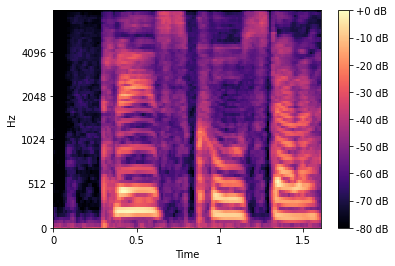

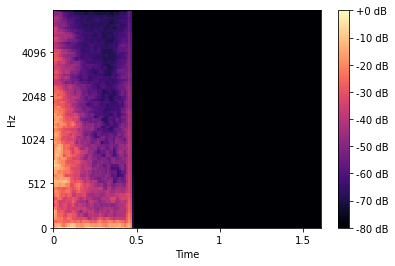

In [27]:
import importlib
import data.VCTK
import numpy as np
importlib.reload(data.VCTK) # prevent cache when making changes

dataset = data.VCTK.VCTKDataset(vctk_dataset_path)
text, clips, spectros = dataset[0]
print(text)
print(clips.shape)
print(spectros.shape)
dataset.show_spectros(spectros)

In [6]:
!pip install webrtcvad

     |████████████████████████████████| 66 kB 2.4 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72475 sha256=e9bbfb44cb0ad2d73aa8b89fc0062f27eb4680a43133bd49188720dcfee5170d
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
Successfully built webrtcvad


In [5]:
import model.model
importlib.reload(model.model) # prevent cache when making changes

model = model.model.FullModel()
# print(model)

text, clips, spectros = dataset[0]
clips = clips[:, :24800]
y_pred = model(clips, spectros)
print(y_pred.shape)

torch.Size([2, 24800]) torch.Size([2, 80, 128])
torch.Size([2, 24800, 512])


/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


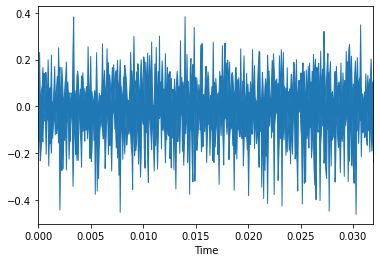

In [10]:
import librosa.display
librosa.display.waveplot(y_pred[0].detach().numpy(), sr=16000)

torch.Size([512, 24800])
wtf
torch.Size([24800])


ParameterError: Audio data must be of type numpy.ndarray

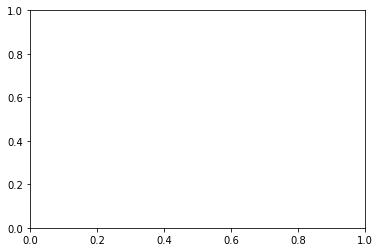

In [28]:
# audio = y_pred[0]
audio = y_pred[0].transpose(0,1)
print(audio.shape)
dataset.show_audios(audio)

In [50]:
y_pred.transpose(2,1).unsqueeze(-1).shape

torch.Size([2, 512, 24800, 1])